# Natural Language Processing (NLP)

## Introduction

*Adapted from [NLP Crash Course](http://files.meetup.com/7616132/DC-NLP-2013-09%20Charlie%20Greenbacker.pdf) by Charlie Greenbacker and [Introduction to NLP](http://spark-public.s3.amazonaws.com/nlp/slides/intro.pdf) by Dan Jurafsky*

### What is NLP?

- Using computers to process (analyze, understand, generate) natural human languages
- Most knowledge created by humans is unstructured text, and we need a way to make sense of it
- Build probabilistic model using data about a language

### What are some of the higher level task areas?

- **Information retrieval**: Find relevant results and similar results
    - [Google](https://www.google.com/)
- **Information extraction**: Structured information from unstructured documents
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation**: One language to another
    - [Google Translate](https://translate.google.com/)
- **Text simplification**: Preserve the meaning of text, but simplify the grammar and vocabulary
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input**: Faster or easier typing
    - [A friend's application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis**: Attitude of speaker
    - [Hater News](http://haternews.herokuapp.com/)
- **Automatic summarization**: Extractive or abstractive summarization
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural Language Generation**: Generate text from data
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation**: Speech-to-text, text-to-speech
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering**: Determine the intent of the question, match query with knowledge base, evaluate hypotheses
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### What are some of the lower level components?

- **Tokenization**: breaking text into tokens (words, sentences, n-grams)
- **Stopword removal**: a/an/the
- **Stemming and lemmatization**: root word
- **TF-IDF**: word importance
- **Part-of-speech tagging**: noun/verb/adjective
- **Named entity recognition**: person/organization/location
- **Spelling correction**: "New Yrok City"
- **Word sense disambiguation**: "buy a mouse"
- **Segmentation**: "New York City subway"
- **Language detection**: "translate this page"
- **Machine learning**

### Why is NLP hard?

- **Ambiguity**:
    - Hospitals are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English**: text messages
- **Idioms**: "throw in the towel"
- **Newly coined words**: "retweet"
- **Tricky entity names**: "Where is A Bug's Life playing?"
- **World knowledge**: "Mary and Sue are sisters", "Mary and Sue are mothers"

NLP requires an understanding of the **language** and the **world**.

## Part 1: Reading in the Yelp Reviews

- "corpus" = collection of documents
- "corpora" = plural form of corpus

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [2]:
# read yelp.csv into a DataFrame
url = '../data/yelp.csv'
yelp = pd.read_csv(url, encoding='unicode-escape')



In [3]:
# EXERCISE create a new DataFrame called yelp_best_worst 
# that only contains the 5-star and 1-star reviews












# ANSWER
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [4]:
yelp_best_worst.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [5]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars
print y.value_counts()

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

5    3337
1     749
dtype: int64


## Part 2: Tokenization

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [6]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [7]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [8]:
# transforming a new sentence, what do you notice?
pd.DataFrame(vect.transform(['please call yourself a cab']).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,1,0,1,0,0


In [9]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [10]:
# rows are documents, columns are terms (phrases) (aka "tokens" or "features")
print X_train_dtm.shape
print X_test_dtm.shape
# Why do they have the same number of features

(3064, 16825)
(1022, 16825)


In [11]:
# first 50 features
print vect.get_feature_names()[:50]

[u'00', u'000', u'00a', u'00am', u'00pm', u'01', u'02', u'03', u'03342', u'04', u'05', u'06', u'07', u'09', u'0buxoc0crqjpvkezo3bqog', u'0l', u'10', u'100', u'1000', u'1000x', u'1001', u'100th', u'101', u'102', u'105', u'1070', u'108', u'10am', u'10ish', u'10min', u'10mins', u'10minutes', u'10pm', u'10th', u'10x', u'11', u'110', u'1100', u'111', u'111th', u'112', u'115th', u'118', u'11a', u'11am', u'11p', u'11pm', u'12', u'120', u'128i']


In [12]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'yyyyy', u'z11', u'za', u'zabba', u'zach', u'zam', u'zanella', u'zankou', u'zappos', u'zatsiki', u'zen', u'zero', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zihuatenejo', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zippers', u'zipps', u'ziti', u'zoe', u'zombi', u'zombies', u'zone', u'zones', u'zoning', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


In [13]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, charset=None,
        charset_error=None, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

- **lowercase:** boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [14]:
# EXERCISE: create a coun vectorizer that doesn't lowercase the words
# fit transform X_train and see how many features there are
# Hint there should be over 20k












In [15]:
# ANSWER
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape # has more features

(3064, 20838)

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [16]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 169847)

In [17]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'zone out', u'zone when', u'zones', u'zones dolls', u'zoning', u'zoning issues', u'zoo', u'zoo and', u'zoo is', u'zoo not', u'zoo the', u'zoo ve', u'zoyo', u'zoyo for', u'zucca', u'zucca appetizer', u'zucchini', u'zucchini and', u'zucchini bread', u'zucchini broccoli', u'zucchini carrots', u'zucchini fries', u'zucchini pieces', u'zucchini strips', u'zucchini veal', u'zucchini very', u'zucchini with', u'zuchinni', u'zuchinni again', u'zuchinni the', u'zumba', u'zumba class', u'zumba or', u'zumba yogalates', u'zupa', u'zupa flavors', u'zuzu', u'zuzu in', u'zuzu is', u'zuzu the', u'zwiebel', u'zwiebel kr\xe4uter', u'zzed', u'zzed in', u'\xe9clairs', u'\xe9clairs napoleons', u'\xe9cole', u'\xe9cole len\xf4tre', u'\xe9m', u'\xe9m all']


**Predicting the star rating:**

In [18]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices :: only single words
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use logistic regression with document feature matrix, NOT the text column
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)

print len(y_test)
# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

1022
0.925636007828


In [19]:
# calculate null accuracy
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.81996086105675148

In [20]:
# EXERCISE define a function, tokenize_test,  that does five things:

# Has a single input, vect, that is a countvectorizer
# instantiates a logistic regression
# fit_transforms X using the vectorizer
# print the number of features (phrases)
# prints the output of a 5 fold cross validation using accuracy as our metric


# eg.

# vect = CountVectorizer(ngram_range=(1, 2))
# tokenize_test(vect)

# Should output:
# Features:  209471
# Accuracy:  0.933431652596
















In [21]:
# ANSWER
def tokenize_test(vect):
    logreg = LogisticRegression()
    X_dtm = vect.fit_transform(X)
    print 'Features: ', X_dtm.shape[1]
    print 'Accuracy: ', cross_val_score(logreg, X_dtm, y, cv=5, scoring='accuracy').mean()

In [22]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  209471
Accuracy:  0.933431652596


## Part 3: Stopword Removal

- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [23]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, charset=None,
        charset_error=None, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

In [24]:
# remove English stop words
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))
tokenize_test(vect)
# made predictions worse! Why?

Features:  191339
Accuracy:  0.926581494928


In [25]:
# set of stop words
print vect.get_stop_words()

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'four', 'not', 'own', 'through', 'yourselves', 'fify', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'go', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'neit

## Part 4: Other CountVectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [26]:
# remove English stop words and only keep 100 features, MUCH FASTER
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Accuracy:  0.888893346555


In [27]:
# all 100 features
print vect.get_feature_names()

[u'amazing', u'area', u'asked', u'atmosphere', u'awesome', u'bad', u'bar', u'best', u'better', u'big', u'came', u'cheese', u'chicken', u'coffee', u'come', u'day', u'definitely', u'delicious', u'did', u'didn', u'dinner', u'don', u'eat', u'excellent', u'experience', u'favorite', u'feel', u'food', u'free', u'fresh', u'friendly', u'friends', u'going', u'good', u'got', u'great', u'happy', u'home', u'hot', u'hour', u'just', u'know', u'like', u'little', u'll', u'location', u'long', u'looking', u'lot', u'love', u'lunch', u'make', u'meal', u'menu', u'minutes', u'need', u'new', u'nice', u'night', u'order', u'ordered', u'people', u'perfect', u'phoenix', u'pizza', u'place', u'pretty', u'price', u'prices', u'really', u'recommend', u'restaurant', u'right', u'said', u'salad', u'sauce', u'say', u'service', u'staff', u'store', u'sure', u'table', u'thing', u'things', u'think', u'time', u'times', u'told', u'took', u'tried', u'try', u've', u'wait', u'want', u'way', u'went', u'wine', u'work', u'worth', u'y

In [28]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

Features:  100000
Accuracy:  0.93612563031


- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [29]:
# include 1-grams and 2-grams, and only include terms that appear at least 3 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=3)
tokenize_test(vect)

Features:  32700
Accuracy:  0.93783741955


## Part 5: Introduction to TextBlob

TextBlob: "Simplified Text Processing"

In [30]:
# print the first review
print yelp_best_worst.text[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [31]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.text[0])

In [32]:
# list the words
review.words

WordList([u'My', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excellent', u'The', u'weather', u'was', u'perfect', u'which', u'made', u'sitting', u'outside', u'overlooking', u'their', u'grounds', u'an', u'absolute', u'pleasure', u'Our', u'waitress', u'was', u'excellent', u'and', u'our', u'food', u'arrived', u'quickly', u'on', u'the', u'semi-busy', u'Saturday', u'morning', u'It', u'looked', u'like', u'the', u'place', u'fills', u'up', u'pretty', u'quickly', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'Do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'Bloody', u'Mary', u'It', u'was', u'phenomenal', u'and', u'simply', u'the', u'best', u'I', u"'ve", u'ever', u'had', u'I', u"'m", u'pretty', u'sure', u'they', u'only', u'use', u'ingredients', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'It', u'was', u'amazing', u'While', u'EVERYTHING', 

In [33]:
# list the sentences
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [34]:
# some string methods are available
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

## Part 6: Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [35]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# stem each word
print [stemmer.stem(word) for word in review.words]

[u'my', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excel', u'the', u'weather', u'was', u'perfect', u'which', u'made', u'sit', u'outsid', u'overlook', u'their', u'ground', u'an', u'absolut', u'pleasur', u'our', u'waitress', u'was', u'excel', u'and', u'our', u'food', u'arriv', u'quick', u'on', u'the', u'semi-busi', u'saturday', u'morn', u'it', u'look', u'like', u'the', u'place', u'fill', u'up', u'pretti', u'quick', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'bloodi', u'mari', u'it', u'was', u'phenomen', u'and', u'simpli', u'the', u'best', u'i', u've', u'ever', u'had', u'i', u"'m", u'pretti', u'sure', u'they', u'onli', u'use', u'ingredi', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'it', u'was', u'amaz', u'while', u'everyth', u'on', u'the', u'menu', u'look', u'excel', u'i', u'ha

**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [36]:
word = Word('wolves')

In [37]:
stemmer.stem(word)

u'wolv'

In [38]:
# assume every word is a noun
print [word.lemmatize() for word in review.words]

[u'My', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'wa', u'excellent', u'The', u'weather', u'wa', u'perfect', u'which', u'made', u'sitting', u'outside', u'overlooking', u'their', u'ground', u'an', u'absolute', u'pleasure', u'Our', u'waitress', u'wa', u'excellent', u'and', u'our', u'food', u'arrived', u'quickly', u'on', u'the', u'semi-busy', u'Saturday', u'morning', u'It', u'looked', u'like', u'the', u'place', u'fill', u'up', u'pretty', u'quickly', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'Do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'Bloody', u'Mary', u'It', u'wa', u'phenomenal', u'and', u'simply', u'the', u'best', u'I', u"'ve", u'ever', u'had', u'I', u"'m", u'pretty', u'sure', u'they', u'only', u'use', u'ingredient', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'It', u'wa', u'amazing', u'While', u'EVERYTHING', u'on', u'the', u'

In [39]:
# assume every word is a verb
print [word.lemmatize(pos='v') for word in review.words]

[u'My', u'wife', u'take', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'be', u'excellent', u'The', u'weather', u'be', u'perfect', u'which', u'make', u'sit', u'outside', u'overlook', u'their', u'ground', u'an', u'absolute', u'pleasure', u'Our', u'waitress', u'be', u'excellent', u'and', u'our', u'food', u'arrive', u'quickly', u'on', u'the', u'semi-busy', u'Saturday', u'morning', u'It', u'look', u'like', u'the', u'place', u'fill', u'up', u'pretty', u'quickly', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'Do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'Bloody', u'Mary', u'It', u'be', u'phenomenal', u'and', u'simply', u'the', u'best', u'I', u"'ve", u'ever', u'have', u'I', u"'m", u'pretty', u'sure', u'they', u'only', u'use', u'ingredients', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'It', u'be', u'amaze', u'While', u'EVERYTHING', u'on', u'the', u'menu', u'l

In [40]:
# define a function that accepts text and returns a list of lemmas
def word_tokenize(text, how='lemma'):
    words = TextBlob(text).words
    if how == 'lemma':
        return [word.lemmatize() for word in words]
    elif how == 'stem':
        return [stemmer.stem(word) for word in words]

In [41]:
# use word_tokenize LEMMA as the feature extraction function (WARNING: SLOW!)
# this will lemmatize each word
vect = CountVectorizer(analyzer=word_tokenize)
tokenize_test(vect)

Features:  23856
Accuracy:  0.932208859444


In [42]:
# use word_tokenize STEM as the feature extraction function (WARNING: SLOW!)
# this will lemmatize each word
vect = CountVectorizer(analyzer=lambda x:word_tokenize(x, how='stem'))
tokenize_test(vect)

Features:  15237
Accuracy:  0.938818413169


## Part 7: Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [43]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [44]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [45]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [46]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0,0.333333,0.0,0,1,1
1,1,0.333333,0.5,0,0,0
2,0,0.333333,0.5,2,0,0


In [47]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


**More details:** [TF-IDF is about what matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

In [48]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28881)

In [49]:
vect = TfidfVectorizer(stop_words='english')
tokenize_test(vect)

Features:  18884
Accuracy:  0.873473450843


## Part 8: Using TF-IDF to Summarize a Yelp Review

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF-IDF!

In [50]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word
    
    # print 5 random words
    print '\n' + 'RANDOM WORDS:'
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print word
    
    # print the review
    print '\n' + review_text

In [51]:
summarize()

TOP SCORING WORDS:
conglomerate
whittle
choose
options
restaurants

RANDOM WORDS:
parking
airports
paradise
higher
mcdonald

Unlike other airports I've been in where your options for food are your massive conglomerate chain restaurants like McDonald's and Burger King, Sky Harbor has a nice array of more local, higher quality restaurants for you to choose from (e.g., La Grande Orange, Olive and Ivy, Barrio Cafe), as well as some healthier choices compared to eating a greasy burger and fries (e.g., Paradise Bakery).  There are a lot of good parking options, whether you choose the airport's own parking lot or private lots that provide shuttle service.  I also appreciate the free wi-fi, it definitely helps whittle the time away while you are waiting for your flight!


## Part 9: Sentiment Analysis

In [52]:
print review

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [53]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.40246913580246907

In [54]:
# understanding the apply method
yelp['length'] = yelp.text.apply(len)
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895


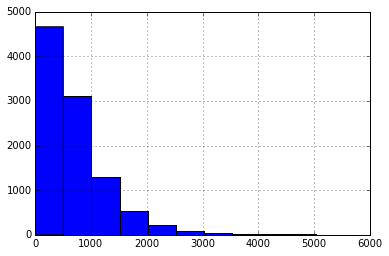

In [55]:
# Show a histogram of yelp review lengths

yelp['length'].hist()

In [56]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [57]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

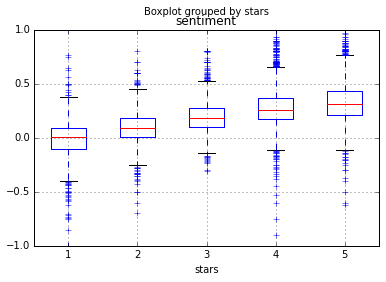

In [58]:
# EXERCISE: make a box plot of sentiment grouped by stars and a histogram of yelp sentiment
# You should have five boxplots in the same graph for sentiment for the first graph









# ANSWER


yelp.boxplot(column='sentiment', by='stars')

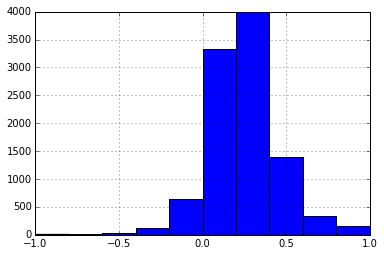

In [59]:
yelp['sentiment'].hist() # Mostly positive!

In [60]:
# EXERCISE Show the reviews with most positive sentiment (a score of 1)










# Answer 

yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \r\nA-MAZ-ING!\r\n...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [61]:
# reviews with most negative sentiment
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [62]:
# widen the column display
pd.set_option('max_colwidth', 500)

In [63]:
# Where sentiment can go wrong

# negative sentiment in a 5-star review
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
390,106JT5p8e8Chtd0CZpcARw,2009-08-06,KowGVoP_gygzdSu6Mt3zKQ,5,"RIP AZ Coffee Connection. :( I stopped by two days ago unaware that they had closed. I am severely bummed. This place is irreplaceable! Damn you, Starbucks and McDonalds!",review,jKeaOrPyJ-dI9SNeVqrbww,1,0,0,175,-0.302083


In [64]:
# positive sentiment in a 1-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,119,0.766667


In [65]:
# reset the column display width
pd.reset_option('max_colwidth')

## Bonus: Adding Features to a Document-Term Matrix

In [68]:
# create a DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [71]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)


AttributeError: 'numpy.ndarray' object has no attribute 'text'

In [72]:
# the other four feature columns that I want to use to predict stars, not just text
X_train.drop('text', axis=1).head()

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
# cast other feature columns to float and convert to a sparse matrix
# Why a sparse matrix, because the other matrix is sparse and the data types must match up
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

In [ ]:
# combine sparse matrices
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

In [ ]:
# repeat for testing set
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

In [ ]:
# use logistic regression with text column only
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
# use logistic regression with all features
logreg = LogisticRegression()
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print metrics.accuracy_score(y_test, y_pred_class)

## Bonus: Fun TextBlob Features

In [ ]:
# spelling correction
TextBlob('15 minuets late').correct()

In [ ]:
# spellcheck
Word('parot').spellcheck()

In [ ]:
# definitions
Word('bank').define('v')

LDA - Latent Dirichlet Allocation
What:  Way of automatically discovering topics from sentences
Why:   Much quicker than manually creating and identifying topic clusters

<a href="http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/">Explanation</a>

In [ ]:
import lda

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=(1,3)) 
reviews = yelp_best_worst.text
sentences_train = vect.fit_transform(reviews)

# Instantiate an LDA model
model = lda.LDA(n_topics=5, n_iter=100)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))

## Conclusion

- NLP is a gigantic field
- Understanding the basics broadens the types of data you can work with
- Simple techniques go a long way
- Use scikit-learn for NLP whenever possible